|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms     
100%|██████████| 50/50 [00:02<00:00, 24.61it/s]


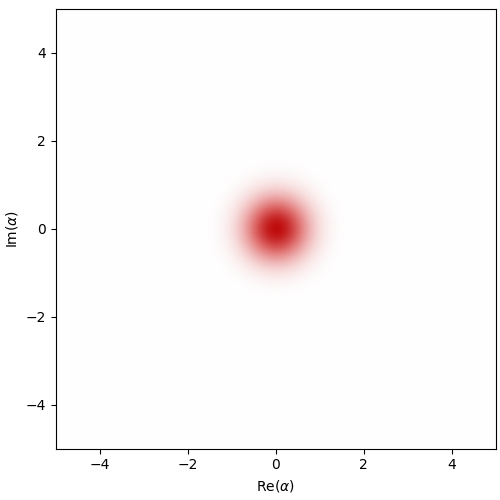

In [1]:
import dynamiqs as dq
import jax.numpy as jnp

n_Fock_a = 20
n_Fock_b = 5

g_2 = 1.0
epsilon_b = -4.0
kappa_b = 10.0

a, b = dq.destroy(n_Fock_a, n_Fock_b)

H = (g_2 * dq.dag(a) @ dq.dag(a) @ b + jnp.conj(g_2) * a @ a @ dq.dag(b) 
+ jnp.conj(epsilon_b) * b + epsilon_b * dq.dag(b) )

psi_0 = dq.tensor(dq.coherent(n_Fock_a, 0.0),  dq.coherent(n_Fock_b, 0.0))

tlist = jnp.linspace(0, 10, 100)

res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b], psi_0, tlist)

# Specify dimensions as a list [n_Fock_a, n_Fock_b]
dims = [n_Fock_a, n_Fock_b]
rho_a = dq.ptrace(res.states, 0, dims)  # Trace out system b (index 1)

dq.plot.wigner_gif(rho_a)